In [241]:
#This block of code import libraries that are required to solve this assignment
import csv 
import json
import random
from datetime import datetime

In [242]:
#This block of code uses context manager to read through customer information and inspect their headers
with open('acw_user_data.csv', mode='r') as customers_record:
    record = csv.reader(customers_record)
    
    for row_number, customer_data in enumerate(record):
        #This block of code inspect the csv headers
        if(row_number == 0):
            print(customer_data)        

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


In [243]:
#This block of code uses context manager to read through customers' information 
#and converts them into nested structure
customers_info = [] #This list will hold customers' information

with open('acw_user_data.csv', mode='r') as customers_record:
    record = csv.DictReader(customers_record)
    
    # this loops into customers' record to access their individual rows and information
    for row_number, customer_data in enumerate(record):
              
        #This code block convert customers' data into nested structure
        customer = {'first_name': customer_data['First Name'], 'second_name':customer_data['Last Name'], 
                    'age': int(customer_data['Age (Years)']),'sex':customer_data['Sex'], 
                    'retired': customer_data['Retired'],'marital_status': customer_data['Marital Status'],
                    'dependants': customer_data['Dependants'],'salary': int(customer_data['Yearly Salary (GBP)']), 
                    'pension': int(customer_data['Yearly Pension (GBP)']),'company':customer_data['Employer Company'], 
                    'commute_distance': float(customer_data['Distance Commuted to Work (miles)']),    
                    'Vehicle':{'make': customer_data['Vehicle Make'],'model': customer_data['Vehicle Model'], 
                    'year':int(customer_data['Vehicle Year']), 'category': customer_data['Vehicle Type']},
                    'Credit Card':{'start_date': customer_data['Credit Card Start Date'],
                    'end_date': customer_data['Credit Card Expiry Date'],
                    'number':int(customer_data['Credit Card Number']),'ccv':int(customer_data['Credit Card CVV']), 
                    'iban':customer_data['Bank IBAN']}, 'Address':{'street': customer_data['Address Street'], 
                     'city':customer_data['Address City'],'postcode': customer_data['Address Postcode']
                    }}
                                                                              
        
        
        customers_info.append(customer) #adds nested structured data into customers' information

In [244]:
customers_info #lets see what we've got 

[{'first_name': 'Kieran',
  'second_name': 'Wilson',
  'age': 89,
  'sex': 'Male',
  'retired': 'True',
  'marital_status': 'married or civil partner',
  'dependants': '3',
  'salary': 72838,
  'pension': 7257,
  'company': 'N/A',
  'commute_distance': 0.0,
  'Vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': 2009,
   'category': 'Pickup'},
  'Credit Card': {'start_date': '08/18',
   'end_date': '11/27',
   'number': 676373692463,
   'ccv': 875,
   'iban': 'GB62PQKB71416034141571'},
  'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'}},
 {'first_name': 'Jonathan',
  'second_name': 'Thomas',
  'age': 46,
  'sex': 'Male',
  'retired': 'False',
  'marital_status': 'married or civil partner',
  'dependants': '1',
  'salary': 54016,
  'pension': 0,
  'company': 'Begum-Williams',
  'commute_distance': 13.72,
  'Vehicle': {'make': 'Nissan',
   'model': 'ATS',
   'year': 1996,
   'category': 'Coupe'},
  'Credit Card': {'start_date': '08/1

In [245]:
#This block of code replaces all empty cells in the dependant column with a random integer
#add append them to a seperate list for data classification
dependants_problematic_rows = [] #This list will store the row number of the empty cells of the dependant column
dependants_problematic_replacements = [] #This list will store new information updated in the empty cells of the dependant column

#looping through the customers' data to access the row number and their respective information
for row_number, customer_data in enumerate(customers_info):
    if(customer_data['dependants'] == ''): #if the column is empty
        customer_data['dependants'] = random.randint(1,10) #replace it with a random number
        dependants_problematic_replacements.append(customer_data['dependants']) #add the random number into this list   
        dependants_problematic_rows.append(row_number) #show the rows numbers of the problematic rows   

In [246]:
#len(customers_info)
#dependants_problematic_replacements
print(dependants_problematic_rows)

[21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


In [247]:
#This block of code uses content manager to write in the nested customers' information into a json file
with open('processed.json', mode= 'w') as processed_file:
    my_file = json.dump(customers_info, processed_file, default = str)

In [248]:
retired = [] #Will store details for all retired customers 
employed = [] #Will store details for all employed customers

#This block of code loops into customers' information to find retired and employed customers
#and append them to their respective lists
for search in customers_info: 
    if(search['company'] != 'N/A'):
        employed.append(search) 
    else:
        retired.append(search) 
        
#print(employed)
#len(employed)
#print(employed)
#len(retired)

In [249]:
#This block of code writes in the retired customers into a json file
with open('retired.json', mode = 'w') as retired_customer:
    json.dump(retired, retired_customer) 

In [250]:
#This block of code writes in the employed customers into a json file
with open('employed.json', mode = 'w') as employed_file:
    json.dump(employed, employed_file)  

In [251]:
#This block of code creates a function to computes the list of customers with credit card greater than 10 years

def remove_customer(row):
        flag = True # all customers with credit card
        
        #This block of code converts the credit card date string to datetime object for year
        end_date_year = datetime.strptime(row['Credit Card']['end_date'], '%m/%y').year
        start_date_year = datetime.strptime(row['Credit Card']['start_date'], '%m/%y').year
        
        #This block of code converts the credit card date string to datetime object for month
        end_date_month = datetime.strptime(row['Credit Card']['end_date'], '%m/%y').month
        start_date_month = datetime.strptime(row['Credit Card']['start_date'], '%m/%y').month

        diff_year = end_date_year - start_date_year #computes the difference between credit card start date and end date for year
        diff_month = end_date_month - start_date_month #computes the difference between credit card start date and end date for month
        
        if diff_year>10: #Checks if the difference is greater than 10 years
            flag = False #customers' with these credit card should be removed
            
        if(diff_year ==10 and diff_month > 0  ): #checks for when difference is 10 years and some months
            flag = False #customers' with these credit card should be removed
        return flag 

In [252]:
removed_ccard = [] #This list will store customers whose credit card were removed

#looping through customers' information
for customer in customers_info:
    #pass all customers as an argument into the remove_customer function to filter through which one to remove/retain
    flag = remove_customer(customer) 
    
    if flag == False: #if the customers' creditcard is greaater than 10
        removed_ccard.append(customer) #add them to this list

In [253]:
#removed_ccard

In [254]:
#len(removed_ccard)

In [255]:
#This block of code writes in the removed customers into a json file
with open('remove_ccard.json', mode = 'w') as remove_card:
    json.dump(removed_ccard, remove_card)  

In [256]:
salary_commute = [] #Will store details of customers based on their commuted distance

#This block of code reads in our processed json file for commuted distance computation
with open('processed.json', mode= 'r') as processed_file:
    file = json.load(processed_file)

    #This block of code loops into the processed file to compute commuted distance for customers and
    #assign values to 'salary-commute' key which will be added to the information
    for column in file:
        if(column['commute_distance'] <= 1): 
            salary = column['salary']        
        else:
            salary = column['salary']/column['commute_distance']
        column['Salary-Commute'] = salary #creates a new key with salary as values for individual customers
        salary_commute.append(column)

In [257]:
#salary_commute

In [258]:
commute = sorted(salary_commute, key = lambda d:d['Salary-Commute']) #sorts records in ascrnding order

In [259]:
#This block of code writes in the new data into a json file
with open('commute.json', mode = 'w') as commute_file:
    json.dump(commute, commute_file)  

Data Visualization

In [260]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [261]:
customer_data = pd.read_csv('acw_user_data.csv') #reads in the csv file with pandas 
customer_data.head() #checking if the file has the right type of data in it

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


In [262]:
customer_data.columns #inspecting the headers

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (miles)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)',
       'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')

In [263]:
customer_data['Yearly Salary (GBP)'] #Data Series for salary

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (GBP), Length: 1000, dtype: int64

In [264]:
customer_data['Yearly Salary (GBP)'].mean() #Mean salary

57814.078

In [265]:
customer_data['Yearly Salary (GBP)'].median() #Median salary

57518.0

In [266]:
customer_data['Age (Years)'] #Data Series for Age

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64

In [267]:
customer_data['Age (Years)'].mean() #Mean Age

54.302

In [268]:
customer_data['Age (Years)'].median() #Median Age

54.0

In [269]:
customer_data['Dependants'].unique() #checking unique elements in the dependant column

array([ 3.,  1.,  2.,  4., nan,  5.])

In [270]:
customer_data['Dependants'].isnull().sum() #checking number of missing values in the column

19

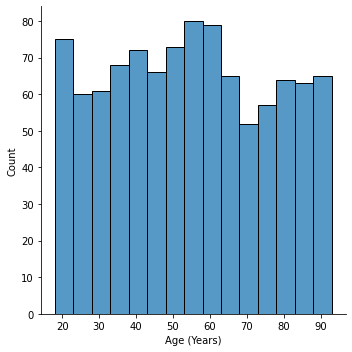

In [271]:
age = sns.displot(customer_data['Age (Years)'], binwidth = 5) #univariate plot for age

In [272]:
customer_data['Dependants'].median()  # calculating the median of dependant column

2.0

In [273]:
customer_data['Dependants'].fillna(2, inplace = True) #replacing the empty dependant column with the median value

In [274]:
customer_data['Dependants'].unique() #accessing unique elements in the dependant column

array([3., 1., 2., 4., 5.])

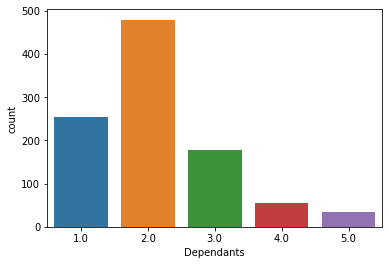

In [275]:
dependants = sns.countplot(data = customer_data, x = 'Dependants') #univariate plot for dependant

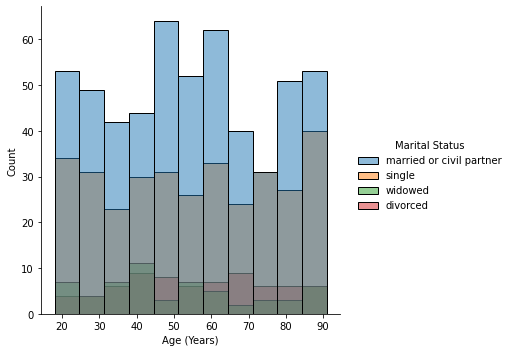

In [276]:
#Age conditioned on Marital Status 
age_marital_status = sns.displot(data = customer_data, x = 'Age (Years)', hue = 'Marital Status')

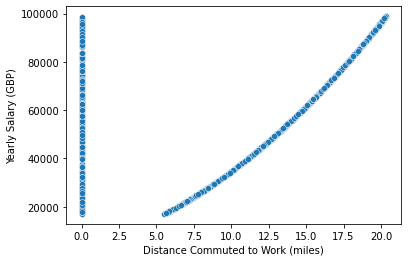

In [277]:
# Commuted distance against salary
distance_salary = sns.scatterplot(data = customer_data, x = 'Distance Commuted to Work (miles)', y = 'Yearly Salary (GBP)')

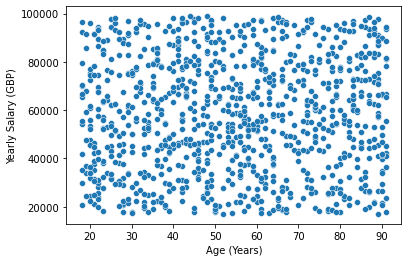

In [278]:
# Age against Salary
age_year = sns.scatterplot(data = customer_data, x = 'Age (Years)', y= 'Yearly Salary (GBP)')

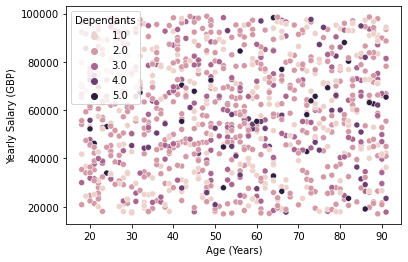

In [279]:
# Age against Salary conditioned by Dependants
age_year_dependants = sns.scatterplot(data = customer_data, x = 'Age (Years)', y= 'Yearly Salary (GBP)', hue = 'Dependants')

In [280]:
#These blocks of code saves the content of all the plots into an image 

age.savefig('./age.png') 
customer_data['./age'] = age

dependants.figure.savefig('./dependants.png')
customer_data['./dependants'] = dependants

age_marital_status.savefig('./age_marital_status.png')
customer_data['./age_marital_status'] = age_marital_status

distance_salary.figure.savefig('./distance_salary.png') 
customer_data['./distance_salary'] = distance_salary

age_year.figure.savefig('./age_year.png')
customer_data['./age_year'] = age_year

age_year_dependants.figure.savefig('./age_year_dependants.png')
customer_data['./age_year_dependants'] = age_year_dependants